In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt('c:\python\ex2data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]

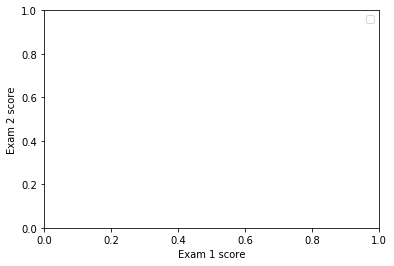

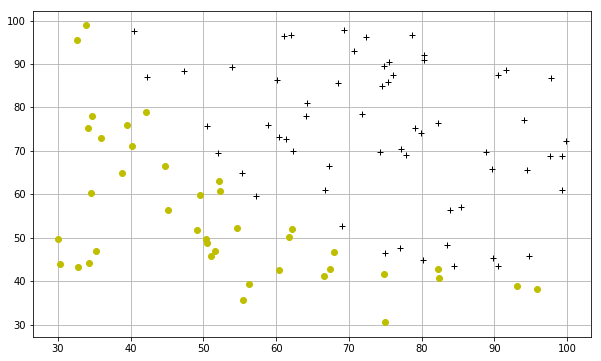

In [48]:
def plotData(X,y):
    plt.figure(figsize=(10,6))
    pos=np.where(y==1)
    neg=np.where(y==0)
    plt.plot(X[pos,0],X[pos,1],'k+',label='admitted')
    plt.plot(X[neg,0],X[neg,1],'yo',label='Not admitted')
    plt.grid(True)
    
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(('admitted','Not admitted'),loc='upper right')
plotData(X,y)


In [4]:
def sigmoid(z):
    g=1/(1+np.exp(-z))
    return g

In [5]:
m,n=np.shape(X)
print(np.shape(X))
X1=np.column_stack((np.ones(m),X))
initial_theta=np.zeros(n+1)
print(np.shape(X1))
print(initial_theta, np.shape(initial_theta),type(initial_theta))

(100, 2)
(100, 3)
[0. 0. 0.] (3,) <class 'numpy.ndarray'>


In [6]:
a=np.array([1,2,3])
a=a.T
np.shape(a)

(3,)

In [7]:
def costFunction(theta,X,y):
    m,n = X.shape
    J=0
    grad=np.zeros(np.size(theta))
    prediction=sigmoid(X.dot(theta))
    J=1/m*sum(-y*np.log(prediction)-(1-y)*np.log(1-prediction))
    error=prediction-y
    delta=1/m*error.T.dot(X)
    grad=delta
    return J, grad

In [8]:
cost, grad = costFunction(initial_theta,X1,y)

print('Cost at initial theta(zeros): %f' % cost)
print('Gradient at initial theta(zeros): %s' % grad)

Cost at initial theta(zeros): 0.693147
Gradient at initial theta(zeros): [ -0.1        -12.00921659 -11.26284221]


In [9]:
import scipy.optimize as op

In [10]:
def myCost(theta,X,y):
    m,n=X.shape
    predictions=X.dot(theta)
    sig_term=sigmoid(predictions)
    J=1/m*np.sum(-y*np.log(sig_term)-(1-y)*np.log(1-sig_term))
    return J

In [11]:
def myGradient(theta,X,y):
    m,n=np.shape(X)
    predictions=sigmoid(X.dot(theta))
    errors=predictions-y
    delta=1/m*errors.T.dot(X)
    grad=delta
    return grad

In [12]:
costFunc=lambda p: costFunction(p,X1,y)[0]
gradFunc=lambda p: costFunction(p,X1,y)[1]

In [13]:
Result=op.minimize(fun=costFunc, x0=initial_theta, method='TNC',jac=gradFunc)
print(Result)
cost=Result.fun
theta=Result.x
print('\n Cost at theta found by fminunc: %s. \n' % cost)
print('theta: %s. \n'%theta)

     fun: 0.2034977015894741
     jac: array([9.22909509e-09, 1.05007760e-07, 4.90380175e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.1613187 ,   0.20623159,   0.20147149])

 Cost at theta found by fminunc: 0.2034977015894741. 

theta: [-25.1613187    0.20623159   0.20147149]. 



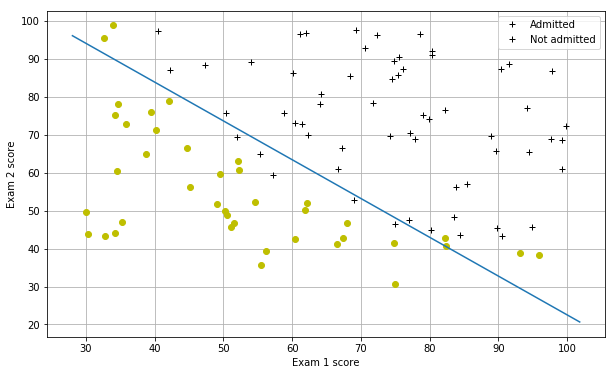

In [49]:
def plotDecisionBoundary(theta,X,y):
    plotData(X[:,1:3],y)
    
    if np.size(X,1)<=3:
        plot_x=np.array([np.min(X[:,1])-2,np.max(X[:,1]+2)])
        plot_y=(-1/theta[2])*(theta[1]*plot_x+theta[0])
        plt.plot(plot_x,plot_y)
        plt.legend(('Admitted','Not admitted'), loc='upper right')
    else:
        u=linspace(-1,1.5,50)
        v=linspace(-1,1.5,50)
        z=np.zeros((np.size(u),np.size(v)))
        
        for i in np.arange(np.size(u)):
            for j in np.arange(np.size(v)):
                z[i,j]=np.sum(mapFeature(u[i],v[j])*theta)
        
        z=z.T
        plt.contour(u,v,z)

plotDecisionBoundary(theta,X1,y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(('Admitted', 'Not admitted'), loc='upper right')

In [37]:
def predict(theta,X):
    m=X.shape[0]
    p=np.zeros(m)
    p=sigmoid(X.dot(theta))>=0.5;
    return p
prob = sigmoid(np.sum(np.array([1,45,85])*theta))
print('For a student with scores 45, 85\n we predict admission prob. of %f'%prob)
p=predict(theta,X1)
print('Train Accuracy: %f ' % (np.mean(np.double(p==y))*100))


For a student with scores 45, 85
 we predict admission prob. of 0.776291
Train Accuracy: 89.000000 


In [53]:
sigmoid((np.array([1,45,85]).dot(theta)))

0.77629062453048